# Analysis
---
**Student name:** T.J. Kyner \
**Student pace:** Full time \
**Instructor name:** Abhineet Kulkarni \
**Cohort:** 040521

This notebook is dedicated to analyzing and visualizing the data that was cleaned and consolidated in the data preprocessing phase (see `prepocessing.ipynb`). A recommendation in response to the business problem outlined below and based on the analysis conducted is included at the bottom of this notebook.

## Business Problem
> Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

---

## Imports & Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
# Consolidated dataframe
df_merged_final = pd.read_csv('../data/cleaned/df_merged_final.csv')

In [3]:
# Setting global styling parameters
sns.set_theme()
primary_color = '#2ecc71'
secondary_color = '#bdc3c7'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14.0
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 144.0

---

## Questions
Answering the following questions will help form and provide evidence for my ultimate recommendation.

### 1. How important are foreign box office results to the overall return on investment?
This question seeks to determine if there is a relationship between the ROI of a movie and how much of its box office revenues came from foreign markets. This is important to determine because a strong correlation would indicate that I should conduct my analysis in the context of how movies perform in foreign markets as being more important than domestic markets. A lack of a relationship would indicate that I can conduct my analysis without needing to adjust for this (such as how different genres perform in different markets).

In [4]:
# Adding columns for ROI and the percent of total revenue that came from foreign box offices
def get_roi_values(df):
    '''
    Description:
    -------------
    Takes a dataframe and adds a return on investment (ROI) column in percentage 
    form. The formula is as follows:
        
        ROI = ((worldwide_gross / production_budget) - 1) * 100
    
    
    Parameters:
    -------------
    df : pandas.DataFrame
        This dataframe must include two specific columns: `production_budget` and 
        `worldwide_gross`. 
    
    
    Example:
    -------------
        >>> d = {'production_budget': [100], 'worldwide_gross': [250]}
        >>> df = pandas.DataFrame(data=d)
        
            production_budget    worldwide_gross
        0                 100                250
        
        >>> get_roi_values(df)
        
            production_budget    worldwide_gross    roi
        0                 100                250    150
    '''
    df['roi'] = ((df['worldwide_gross'] / df['production_budget']) - 1) * 100
    return df

df_foreign = df_merged_final.dropna().copy()
df_foreign = get_roi_values(df_foreign)
df_foreign['foreign_pct'] = (df_foreign['foreign_gross'] / df_foreign['worldwide_gross']) * 100
df_foreign.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,Game-Show,Mystery,Musical,Family,War,...,numvotes,release_date,release_year,movie,production_budget,domestic_gross,foreign_gross,worldwide_gross,roi,foreign_pct
19,tt0249516,Foodfight!,Foodfight!,2012,91.0,0.0,0.0,0.0,0.0,0.0,...,8248.0,"Dec 31, 2012",2012.0,Foodfight!,45000000.0,0.0,73706.0,73706.0,-99.836209,100.000000
48,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,0.0,0.0,0.0,0.0,0.0,...,275300.0,"Dec 25, 2013",2013.0,The Secret Life of Walter Mitty,91000000.0,58236838.0,129624345.0,187861183.0,106.440860,69.000069
52,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,0.0,0.0,0.0,0.0,0.0,...,105116.0,"Sep 19, 2014",2014.0,A Walk Among the Tombstones,28000000.0,26017685.0,36090902.0,62108587.0,121.816382,58.109359


In [5]:
# Previewing the correlation between the two newly added columns
df_foreign[['roi', 'foreign_pct']].corr()

,roi,foreign_pct
roi,1.000000,0.011047
foreign_pct,0.011047,1.000000


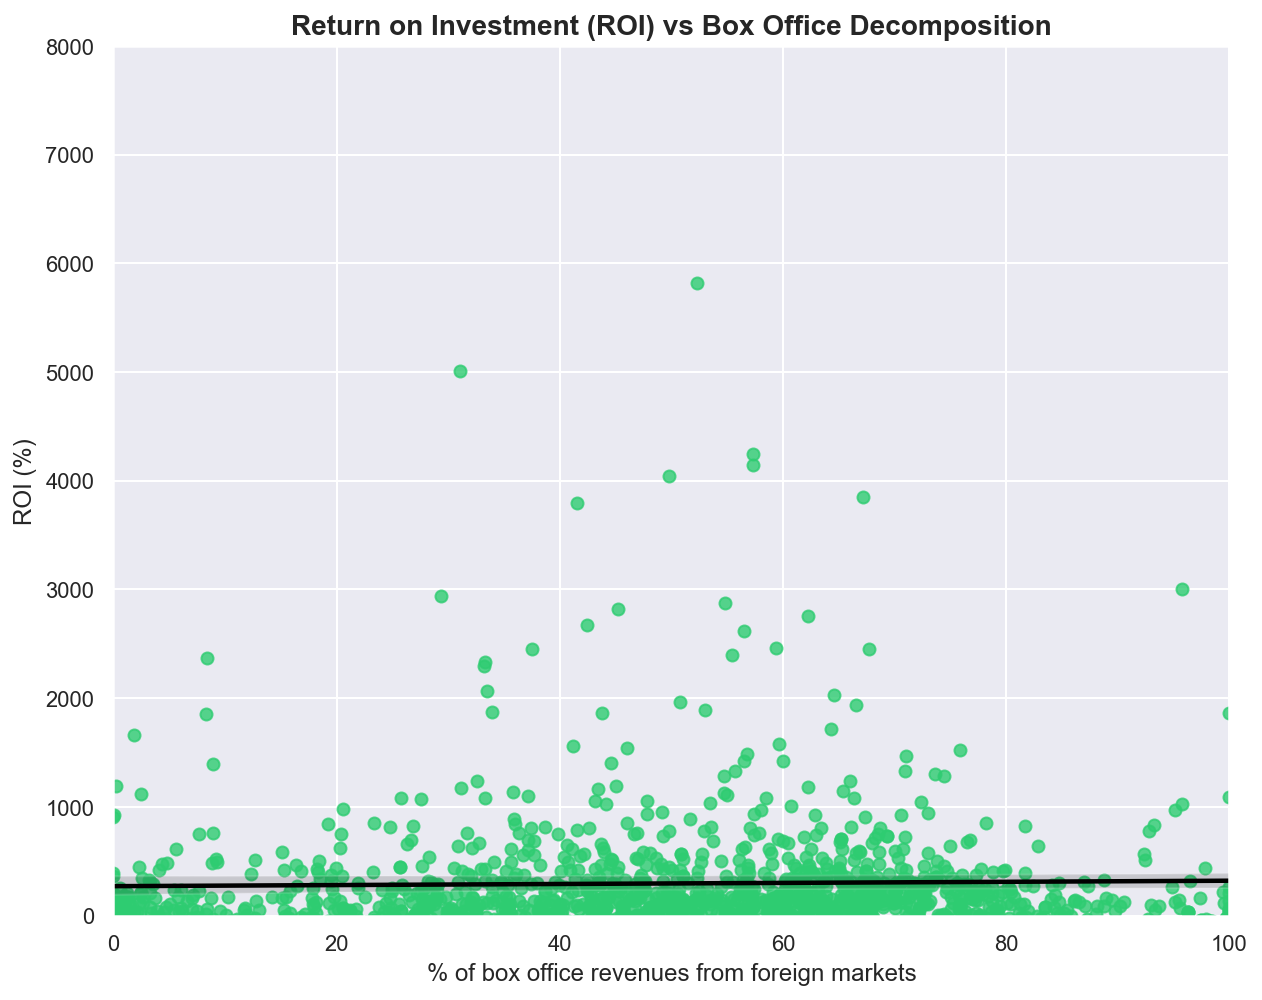

In [6]:
fig, ax = plt.subplots()

# Styling
ax.set_title('Return on Investment (ROI) vs Box Office Decomposition')
ax.set_ylabel('ROI (%)')
ax.set_xlabel('% of box office revenues from foreign markets')
ax.set_ylim(0, 8000)

# Plotting
sns.regplot(
    x=df_foreign['foreign_pct'].values, 
    y=df_foreign['roi'].values, 
    scatter_kws={'color': primary_color}, 
    line_kws={'color': 'black'}
)

# Saving image
plt.savefig('../images/roi_vs_bo-decomp.png')

### 2. Which genres have the highest median return on investment?
The answer to this question will significantly reduce the number of potential genre recommendations. Any genres that have a negative median ROI can be automatically excluded and the focus will be on those genres with the highest median ROI.

In [7]:
genres = df_merged_final.columns[5:32].values
genres

array(['Game-Show', 'Mystery', 'Musical', 'Family', 'War', 'Sport',
       'Reality-TV', 'Short', 'History', 'Adult', 'Western', 'Action',
       'Music', 'Comedy', 'Horror', 'Talk-Show', 'Documentary',
       'Adventure', 'Fantasy', 'Thriller', 'Animation', 'Biography',
       'Crime', 'Romance', 'Sci-Fi', 'News', 'Drama'], dtype=object)

In [8]:
def get_median_roi(genre):
    '''
    Description:
    -------------
    Returns the median ROI for a specific genre from a copy of the df_merged_final 
    dataframe.
    
    
    Parameters:
    -------------
    genre : str
        One of the genres contained in the df_merged_final dataframe (Game-Show, Mystery, 
        Musical, Family, War, Sport, Reality-TV, Short, History, Adult, Western, Action,
        Music, Comdey, Horror, Talk-Show, Documentary, Adventure, Fantasy, Thriller,
        Animation, Biography, Crime, Romance, Sci-Fi, News, Drama).
    
    
    Example:
    -------------
        >>> get_median_roi("Drama")
        94.57036666666667
    '''
    df_genre = df_merged_final.copy()
    df_genre = df_genre.loc[(df_genre[genre] == 1) & df_genre['worldwide_gross'] > 0]
    df_genre = get_roi_values(df_genre)
    return df_genre.roi.median()

In [9]:
# Sorting the data for easier plotting
df_genre_median_roi = pd.DataFrame(
    data=[get_median_roi(genre) for genre in genres],
    columns=['median_roi'],
    index=genres
).dropna().sort_values('median_roi', ascending=False)

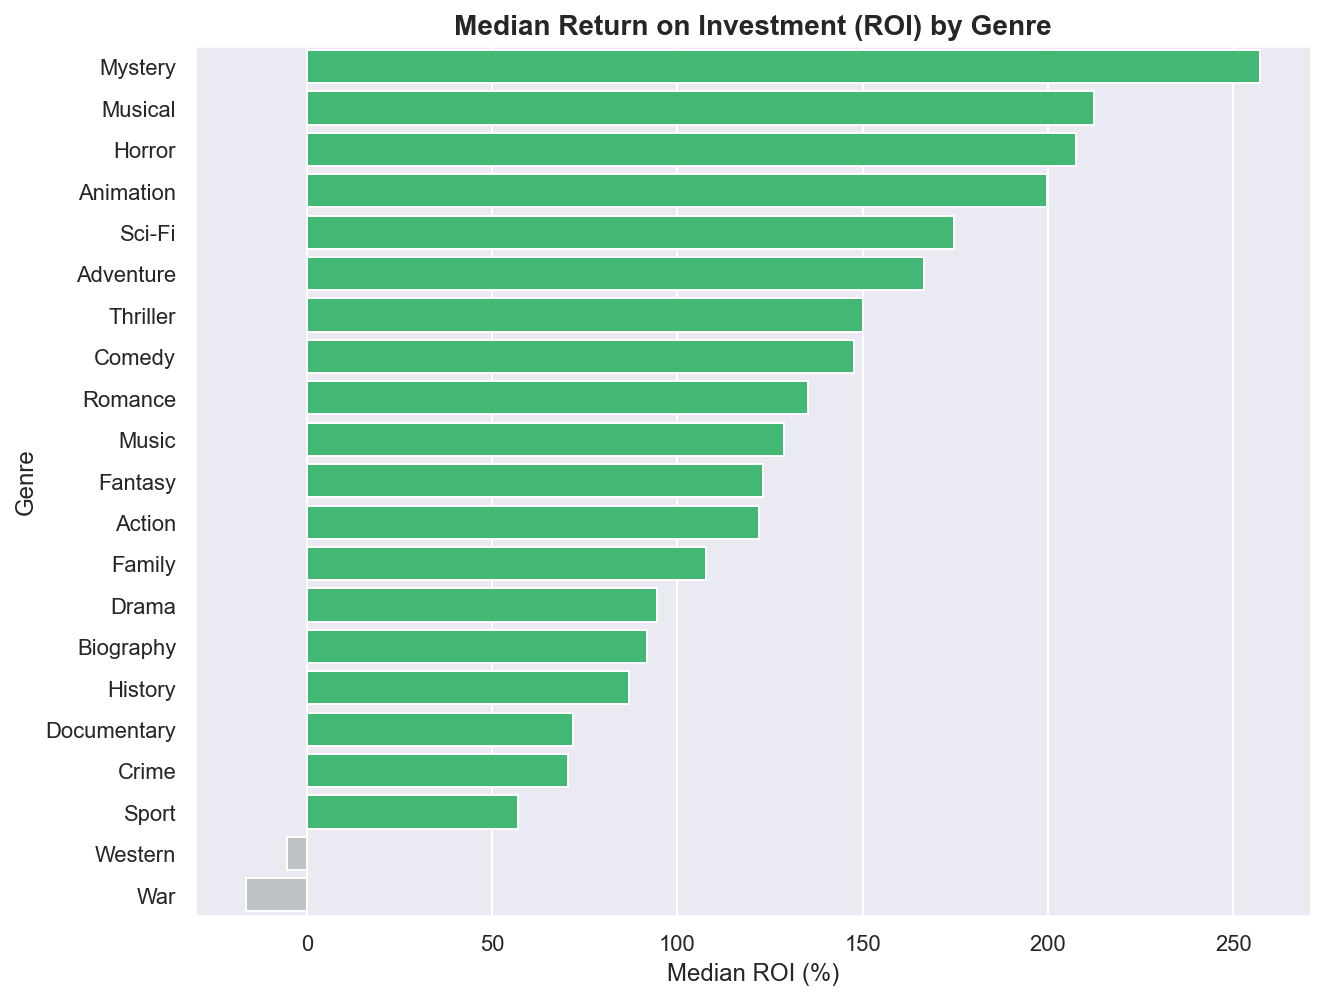

In [10]:
fig, ax = plt.subplots()

# Styling
ax.set_title('Median Return on Investment (ROI) by Genre')
ax.set_ylabel('Genre')
ax.set_xlabel('Median ROI (%)')

# Plotting
sns.barplot(
    x=df_genre_median_roi['median_roi'].values,
    y=df_genre_median_roi.index,
    orient='h',
    palette=[primary_color if x > 0 else secondary_color for x in df_genre_median_roi['median_roi'].values]
)

# Saving image
plt.savefig('../images/median_roi_genre.png')

### 3. Are there any noticeable trends in the number of movies produced in a particular genre?
The goal of this question is to create a proxy for genre popularity by investigating the change in the amount of movies produced in a particular genre over time. While popularity does not necessarily imply whether or not a particular genre is profitable, this information can be used in conjunction with answers to other questions to evaluate the probability of succes.

To start, I'll whittle down the dataframe to just information regarding the start year and genre.

In [11]:
cols_to_drop = ['primary_title', 'original_title', 'runtime_minutes', 'averagerating', 'numvotes', 
                'release_date', 'release_year', 'movie', 'production_budget', 'domestic_gross', 
                'foreign_gross', 'worldwide_gross']

df_genre_trends = df_merged_final.drop(columns=cols_to_drop)
df_genre_trends.head(3)

,tconst,start_year,Game-Show,Mystery,Musical,Family,War,Sport,Reality-TV,Short,...,Adventure,Fantasy,Thriller,Animation,Biography,Crime,Romance,Sci-Fi,News,Drama
0,tt0063540,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,tt0066787,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,tt0069049,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The dataframe now needs to be pivoted by `start_year`.

In [12]:
df_genre_count_by_year = pd.pivot_table(df_genre_trends, index='start_year', aggfunc='sum')
df_genre_count_by_year

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,889.0,0.0,500.0,198.0,792.0,2178.0,537.0,4381.0,4290.0,479.0,...,177.0,7.0,847.0,242.0,0.0,185.0,3.0,831.0,140.0,38.0
2011,910.0,0.0,580.0,256.0,889.0,2327.0,570.0,4742.0,4523.0,598.0,...,201.0,0.0,846.0,276.0,1.0,217.0,4.0,908.0,138.0,44.0
2012,915.0,1.0,637.0,243.0,1011.0,2481.0,599.0,5208.0,4792.0,677.0,...,245.0,5.0,869.0,283.0,1.0,219.0,4.0,1016.0,136.0,45.0
2013,1007.0,0.0,791.0,254.0,1252.0,2652.0,716.0,5563.0,5348.0,862.0,...,301.0,9.0,1034.0,355.0,0.0,275.0,4.0,1245.0,119.0,41.0
2014,1072.0,3.0,793.0,280.0,1375.0,2810.0,748.0,5961.0,5475.0,876.0,...,330.0,8.0,1138.0,351.0,0.0,278.0,4.0,1318.0,171.0,63.0
2015,1092.0,2.0,713.0,309.0,951.0,2747.0,737.0,6015.0,5483.0,680.0,...,161.0,19.0,1082.0,388.0,0.0,255.0,11.0,1327.0,170.0,52.0
2016,1207.0,5.0,706.0,301.0,817.0,2852.0,859.0,6054.0,5587.0,594.0,...,57.0,19.0,1073.0,379.0,0.0,275.0,8.0,1394.0,164.0,40.0
2017,1254.0,4.0,671.0,334.0,744.0,2788.0,776.0,6124.0,5609.0,578.0,...,39.0,15.0,975.0,422.0,4.0,234.0,2.0,1370.0,161.0,54.0
2018,1127.0,9.0,616.0,338.0,590.0,2833.0,730.0,5294.0,5620.0,566.0,...,29.0,11.0,982.0,389.0,5.0,199.0,7.0,1485.0,143.0,59.0


This data was likely gathered some time in 2019 given the sharp drop in the number of movies during that year with no apparent reason (unlike a year such as 2020 where the impact of COVID-19 may have been a cause for the decline). As a result, only the rows with a `start_year` less than or equal to 2018 will be kept for analysis.

In [13]:
df_genre_count_by_year = df_genre_count_by_year.loc[df_genre_count_by_year.index <= 2018]
df_genre_count_by_year

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,889.0,0.0,500.0,198.0,792.0,2178.0,537.0,4381.0,4290.0,479.0,...,177.0,7.0,847.0,242.0,0.0,185.0,3.0,831.0,140.0,38.0
2011,910.0,0.0,580.0,256.0,889.0,2327.0,570.0,4742.0,4523.0,598.0,...,201.0,0.0,846.0,276.0,1.0,217.0,4.0,908.0,138.0,44.0
2012,915.0,1.0,637.0,243.0,1011.0,2481.0,599.0,5208.0,4792.0,677.0,...,245.0,5.0,869.0,283.0,1.0,219.0,4.0,1016.0,136.0,45.0
2013,1007.0,0.0,791.0,254.0,1252.0,2652.0,716.0,5563.0,5348.0,862.0,...,301.0,9.0,1034.0,355.0,0.0,275.0,4.0,1245.0,119.0,41.0
2014,1072.0,3.0,793.0,280.0,1375.0,2810.0,748.0,5961.0,5475.0,876.0,...,330.0,8.0,1138.0,351.0,0.0,278.0,4.0,1318.0,171.0,63.0
2015,1092.0,2.0,713.0,309.0,951.0,2747.0,737.0,6015.0,5483.0,680.0,...,161.0,19.0,1082.0,388.0,0.0,255.0,11.0,1327.0,170.0,52.0
2016,1207.0,5.0,706.0,301.0,817.0,2852.0,859.0,6054.0,5587.0,594.0,...,57.0,19.0,1073.0,379.0,0.0,275.0,8.0,1394.0,164.0,40.0
2017,1254.0,4.0,671.0,334.0,744.0,2788.0,776.0,6124.0,5609.0,578.0,...,39.0,15.0,975.0,422.0,4.0,234.0,2.0,1370.0,161.0,54.0
2018,1127.0,9.0,616.0,338.0,590.0,2833.0,730.0,5294.0,5620.0,566.0,...,29.0,11.0,982.0,389.0,5.0,199.0,7.0,1485.0,143.0,59.0


Genres with zero movies produced in 2010 present an issue since growth between then and 2018 cannot be calculated without running into a division by zero error. Since these genres have very few movies produced in any given year anyways, they can be dropped.

In [14]:
cols_to_drop = [col for col in df_genre_count_by_year.columns if df_genre_count_by_year[col][2010] == 0]
cols_to_drop

['Adult', 'Game-Show', 'Short']

In [15]:
df_genre_count_by_year = df_genre_count_by_year.drop(columns=cols_to_drop)

In [16]:
def get_pct_chg(genre):
    '''
    Description:
    -------------
    Returns the percentage change for the number of movies in a genre between 2010 and 2018
    if the number of movies in the genre in 2010 was greater than 0. Cases where the
    number of movies in the genre in 2010 was equal to 0 result in a dividing by zero error 
    and therefore the function returns `NoneType` in those instances.
    
    
    Parameters:
    -------------
    genre : str
        One of the genres in the df_genre_count_by_year dataframe (Mystery, Musical, 
        Family, War, Sport, Reality-TV, History, Western, Action, Music, Comedy,
        Horror, Talk-Show, Documentary, Adventure, Fantasy, Thriller, Animation,
        Biography, Crime, Romance, Sci-Fi, News, Drama).
    
          
    Example:
    -------------
        >>> get_pct_chg("Drama")
        31.0
    '''
    if df_genre_count_by_year[genre][2010] > 0:
        return round(((df_genre_count_by_year[genre][2018] / df_genre_count_by_year[genre][2010]) - 1) * 100, 2)

In [17]:
# Sorting the data for easier plotting
df_genre_pct_chg = pd.DataFrame(
    data=[get_pct_chg(col) for col in df_genre_count_by_year.columns],
    columns=['Pct_Chg'],
    index=df_genre_count_by_year.columns
).sort_values('Pct_Chg', ascending=False)

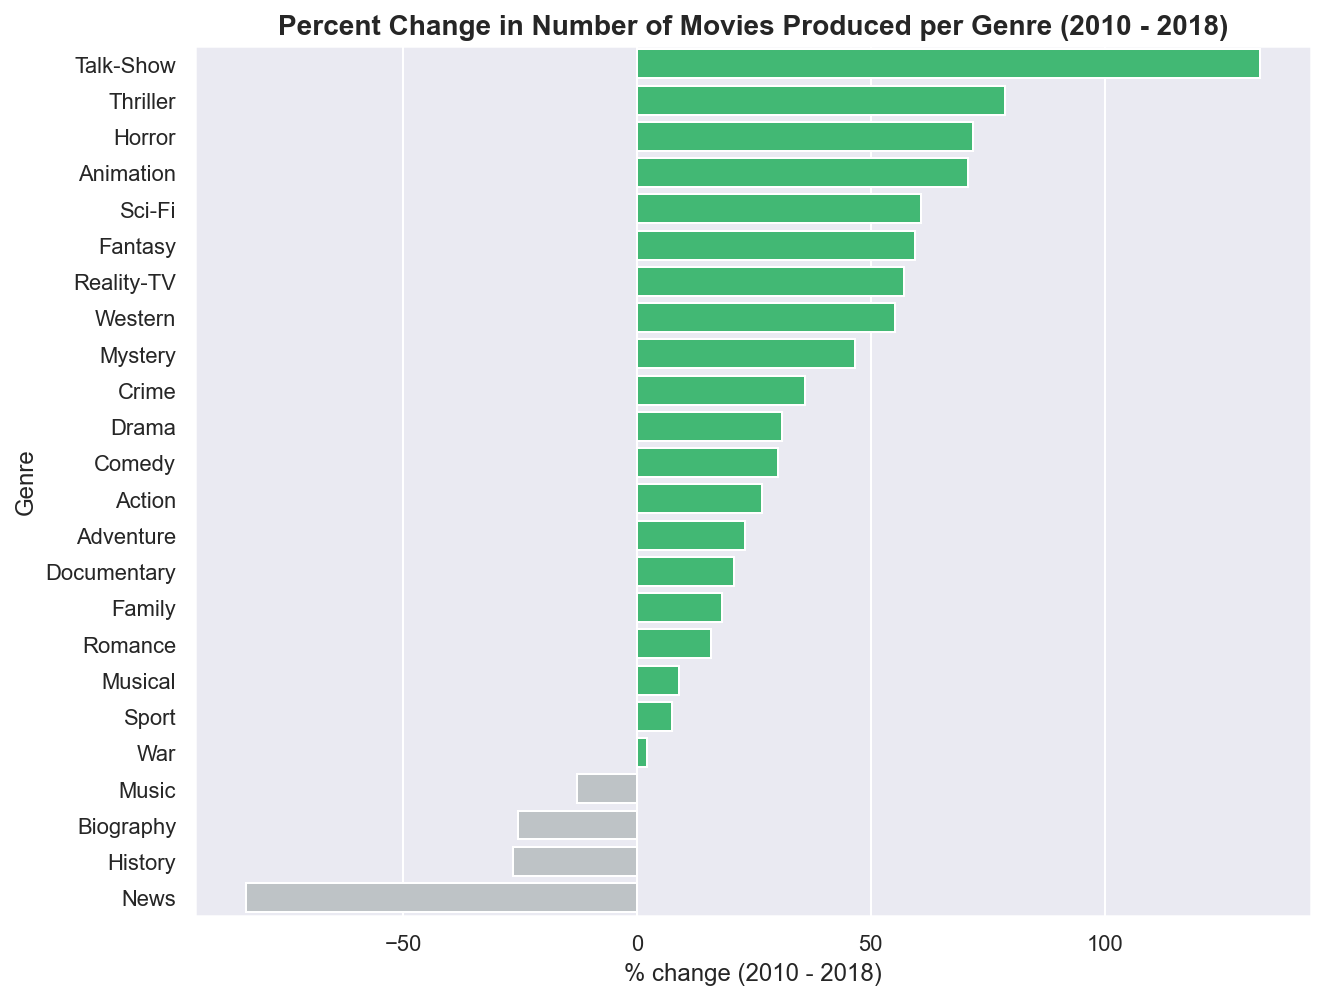

In [18]:
fig, ax = plt.subplots()

# Styling
ax.set_title('Percent Change in Number of Movies Produced per Genre (2010 - 2018)')
ax.set_ylabel('Genre')
ax.set_xlabel('% change (2010 - 2018)')

# Plotting
sns.barplot(
    x=df_genre_pct_chg['Pct_Chg'].values,
    y=df_genre_pct_chg.index,
    orient='h',
    palette=[primary_color if x > 0 else secondary_color for x in df_genre_pct_chg['Pct_Chg'].values]
)

# Saving image
plt.savefig('../images/genre_pct_chg.png')

### 4. What months have the highest median return on investment?
This question helps determine the timing of when to release a movie. Targeting months in which the median ROI of movies is the highest may lead to a higher probability of success.

To answer this question, I must first create a new column that derives the month from the `release_date` column.

In [19]:
df_release_dates = df_merged_final[['release_date', 'production_budget', 'worldwide_gross']].dropna()
df_release_dates = get_roi_values(df_release_dates)

# This lambda function returns the number of the month (i.e., Jan = 1, Feb = 2, etc.)
months = lambda x: int(datetime.strptime(x, '%b %d, %Y').strftime('%m'))
df_release_dates.insert(loc=1, column='month', value=df_release_dates['release_date'].apply(months))

df_release_dates.head()

,release_date,month,production_budget,worldwide_gross,roi
19,"Dec 31, 2012",12,45000000.0,7.370600e+04,-99.836209
48,"Dec 25, 2013",12,91000000.0,1.878612e+08,106.440860
52,"Sep 19, 2014",9,28000000.0,6.210859e+07,121.816382
54,"Jun 12, 2015",6,215000000.0,1.648855e+09,666.909239
56,"Oct 28, 2011",10,45000000.0,2.154473e+07,-52.122818


Pivoting the dataframe allows me to get the median `roi` (as well as `production_budget` and `worldwide_gross`) values for each month.

In [20]:
df_pivot = pd.pivot_table(df_release_dates, index='month', aggfunc='median')
df_pivot

,production_budget,roi,worldwide_gross
month,,,
1,28000000.0,136.467518,56177628.5
2,30000000.0,145.343720,65532491.0
3,33500000.0,103.946078,73746965.0
4,25000000.0,125.843689,48977233.0
5,35000000.0,145.898193,84154026.0
6,30000000.0,117.552815,67655332.5
7,26500000.0,171.830609,91056537.0
8,20000000.0,93.104617,49858465.0
9,18000000.0,72.800331,30466117.0


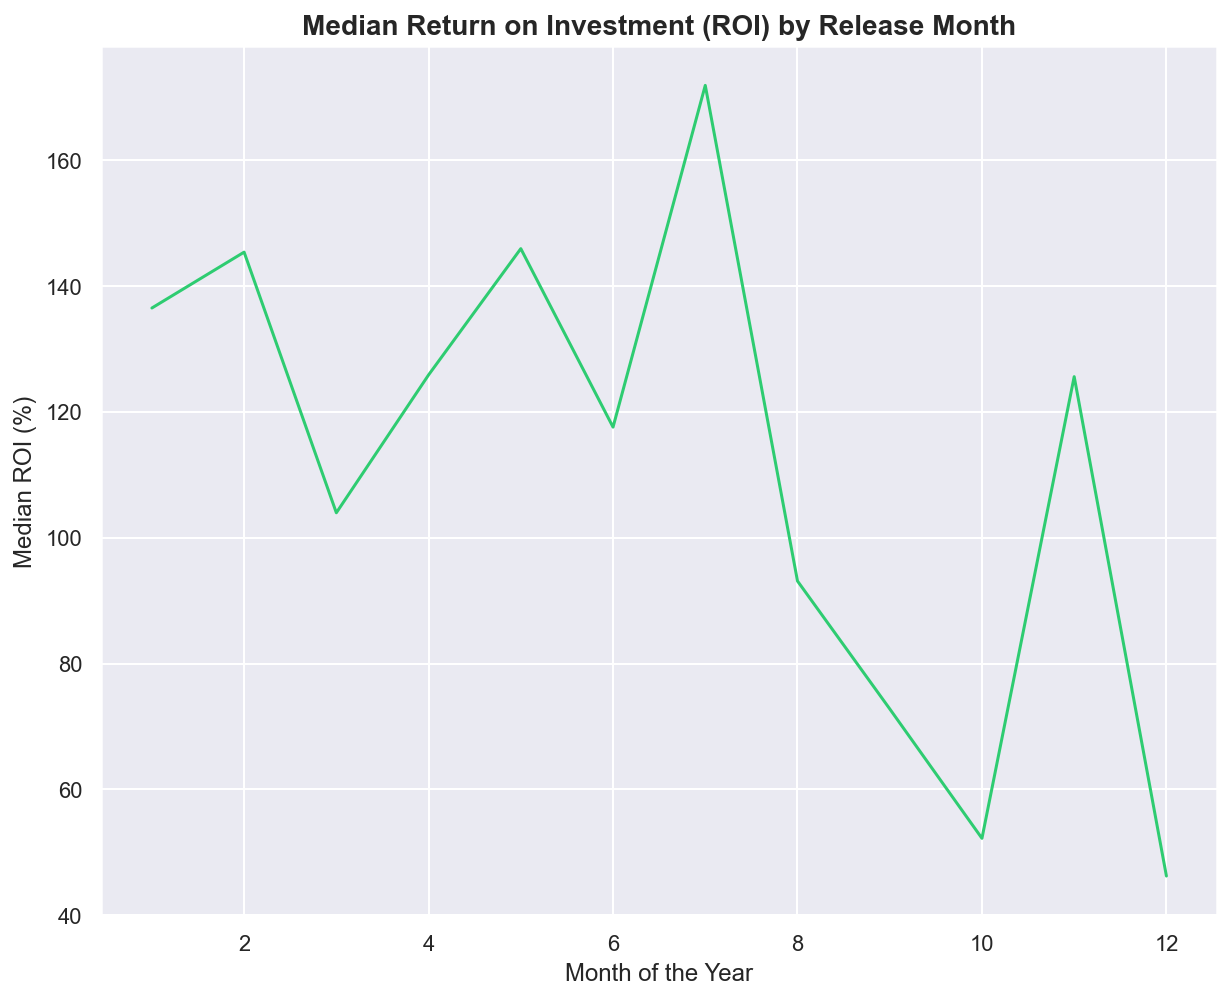

In [21]:
fig, ax = plt.subplots()

# Styling
ax.set_title('Median Return on Investment (ROI) by Release Month')
ax.set_ylabel('Median ROI (%)')
ax.set_xlabel('Month of the Year')

# Plotting
sns.lineplot(
    x=df_pivot.index, 
    y=df_pivot['roi'],
    color=primary_color
)

# Saving image
plt.savefig('../images/median_roi_month.png')

### 5. Does the runtime of a movie in the Mystery genre affect its ROI?
The answers to the above questions led me to recommending the Mystery genre. This question dives a bit deeper into what qualities of a Mystery movie are associated with a higher ROI.

In [22]:
cols = ['runtime_minutes', 'Mystery', 'production_budget', 'worldwide_gross']
df_mystery_movies = df_merged_final[cols].loc[df_merged_final['Mystery'] == 1].dropna()
df_mystery_movies = get_roi_values(df_mystery_movies)
df_mystery_movies

,runtime_minutes,Mystery,production_budget,worldwide_gross,roi
90,92.0,1.0,14000000.0,82925064.0,492.321886
221,102.0,1.0,25000000.0,82917283.0,231.669132
330,101.0,1.0,21000000.0,109501146.0,421.434029
383,107.0,1.0,25000000.0,16727470.0,-33.090120
428,103.0,1.0,38000000.0,27573078.0,-27.439268
...,...,...,...,...,...
111358,116.0,1.0,20000000.0,254210310.0,1171.051550
113570,113.0,1.0,21000000.0,0.0,-100.000000
114790,98.0,1.0,1500000.0,14244931.0,849.662067
122391,127.0,1.0,10000000.0,70133905.0,601.339050


In [23]:
df_mystery_movies.describe()

,runtime_minutes,Mystery,production_budget,worldwide_gross,roi
count,126.000000,126.0,1.260000e+02,1.260000e+02,126.000000
mean,105.912698,1.0,2.459185e+07,8.994706e+07,869.924839
std,18.287053,0.0,3.063554e+07,1.080881e+08,3772.410542
min,79.000000,1.0,2.500000e+04,0.000000e+00,-100.000000
25%,93.000000,1.0,5.000000e+06,1.301835e+07,-10.490060
50%,103.000000,1.0,1.200000e+07,4.419994e+07,223.341050
75%,112.750000,1.0,3.350000e+07,1.091975e+08,612.839179
max,172.000000,1.0,1.850000e+08,5.864643e+08,41556.474000


There is an outlier for the `roi` column which needs to be removed.

In [24]:
df_mystery_movies = df_mystery_movies.loc[df_mystery_movies.roi != max(df_mystery_movies.roi)]

Now that the outlier has been removed, it's time to plot the remaining data.

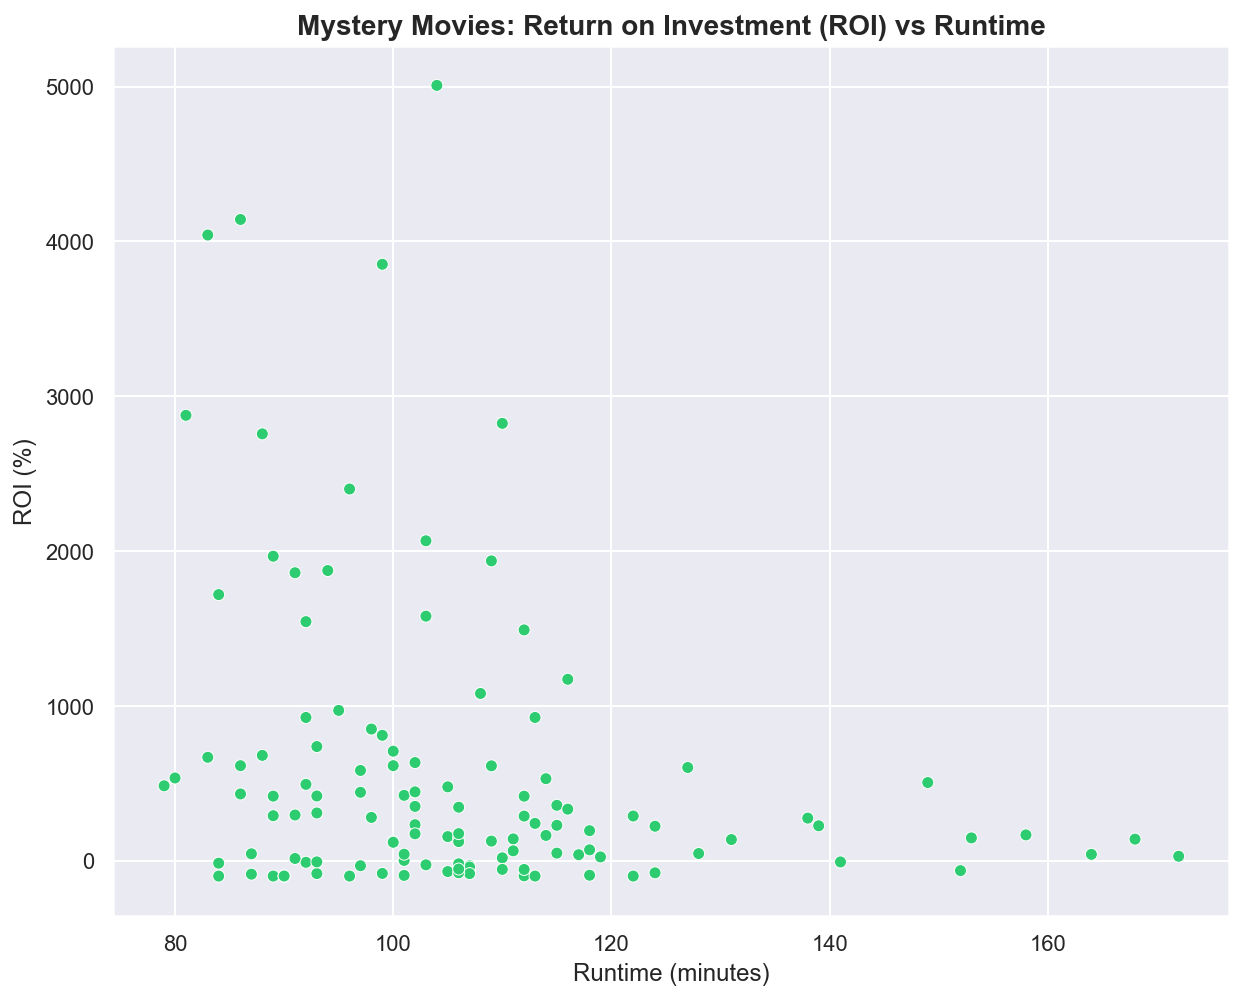

In [25]:
fig, ax = plt.subplots()

# Styling
ax.set_title('Mystery Movies: Return on Investment (ROI) vs Runtime')
ax.set_ylabel('ROI (%)')
ax.set_xlabel('Runtime (minutes)')

# Plotting
sns.scatterplot(
    x=df_mystery_movies.runtime_minutes, 
    y=df_mystery_movies.roi,
    hue=df_mystery_movies.Mystery,
    palette=[primary_color],
    legend=False
)

# Saving image
plt.savefig('../images/mystery_runtime_roi.png')

---

## Conclusion & Recommendation
To maximize the potential return on investment, Microsoft Studios should produce a movie with the following characteristics:
- **Mystery genre**
- Runtime **under 2 hours** 
- Released in **May or July**

The data supports this recommendation since the Mystery genre has the highest median ROI of any genre, is increasing in popularity, and is most profitable for runtimes under two hours. Furthermore, targeting a release date in May or July increases the probability of success given the higher median ROIs for movies released in those two months.

### Next Steps
Next steps in the analysis include exploring what makes a good Mystery movie and answering the following questions:
- Are there any specific directors or writers that excel in the Mystery genre?
- What should the production budget be?
- Can box office data be found for movies older than 2010?